# First section


In [ ]:
"""
Graph Mining - ALTEGRAD - Dec 2021
"""

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


############## Task 1
path_to_file = "/content/CA-HepTh.txt"
G = nx.readwrite.edgelist.read_edgelist(path_to_file, delimiter = "\t")
print('Number of nodes :', len(G.nodes))
print('Number of edges :', len(G.edges))


############## Task 2
giant_connected_component = max(nx.connected_components(G), key=len)
sub_G = G.subgraph(giant_connected_component)
print("\nNumber of connected components :", nx.number_connected_components(G))
print("Number of nodes in the largest connected component of G :",len(sub_G.nodes))
print("Number of edges in the largest connected component of G :",len(sub_G.edges))



Number of nodes : 9877
Number of edges : 25998

Number of connected components : 429
Number of nodes in the largest connected component of G : 8638
Number of edges in the largest connected component of G : 24827


__Question 1:__

Let C be the cycle of n nodes and n edges. 
A connected component with k nodes must have at least k-1 edges. Therefore if we remove two edges to C, the emerging graph will have 2 connected components.






Minimum degree of nodes in the graph : 1
Maximum degree of nodes in the graph : 65
Median degree of nodes in the graph : 3.0
Mean degree of nodes in the graph : 5.264351523742027


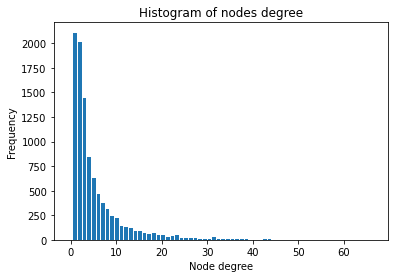

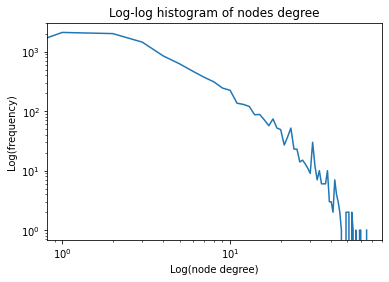

In [ ]:

############## Task 3
# Degree
degree_sequence = [G.degree(node) for node in G.nodes()]
print("\nMinimum degree of nodes in the graph :", np.min(degree_sequence))
print("Maximum degree of nodes in the graph :", np.max(degree_sequence))
print("Median degree of nodes in the graph :", np.median(degree_sequence))
print("Mean degree of nodes in the graph :", np.mean(degree_sequence))



############## Task 4
max_degree = len(nx.degree_histogram(G))
plt.bar(np.linspace(0, max_degree, max_degree),nx.degree_histogram(G))
plt.xlabel("Node degree")
plt.ylabel('Frequency')
plt.title('Histogram of nodes degree')
plt.show()

plt.loglog(nx.degree_histogram(G))
plt.xlabel("Log(node degree)")
plt.ylabel("Log(frequency)")
plt.title('Log-log histogram of nodes degree')
plt.show()



__Question 2 :__

No, two graphs having the same degree distribution are not always isomorphic as we can see in the folloxing counter-example. 

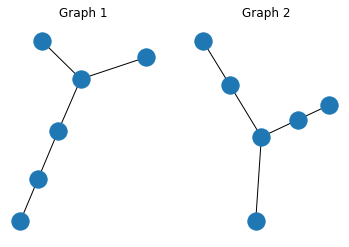

In [ ]:
G1 = nx.Graph()
G1.add_edges_from([('A','B'),('B','C'),('B','D'),('D','E'),('E','F')])
plt.subplot(121)
nx.draw(G1)
plt.title('Graph 1')


G2 = nx.Graph()
G2.add_edges_from([('A','B'),('B','C'),('C','D'),('C','E'),('E','F')])
plt.subplot(122)
nx.draw(G2)
plt.title('Graph 2')
plt.show()

In [ ]:
############## Task 5
print("Global clustering coefficient of the graph :", nx.transitivity(G))

Global clustering coefficient of the graph : 0.2839996525875546


__Question 3:__

A fully connected group of n nodes has n*(n-1)/2 edges. Therefore G is nearly fully connected, only one edge is missing. A fully connected graphs contains $\binom n3$ triangles, since all triplets form a triangle. If we remove one edge, n-2 triangles are broken. Therefore G has $\binom n3 - (n-2)$ triangle. Therefore the global clustering coefficient C is equal to $ C = \frac{\binom n3 -(n-2)}{\binom n3} = 1 - \frac{n-2}{\binom n3}$.

# New Section

In [9]:
from networkx.algorithms.cluster import clustering
"""
Graph Mining - ALTEGRAD - Dec 2021
"""

import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigs
from random import randint
from sklearn.cluster import KMeans


############## Task 6
# Perform spectral clustering to partition graph G into k clusters
def spectral_clustering(G, k):
    # 1
    n = G.number_of_nodes()
    A = nx.adjacency_matrix(G)
    inv_D = np.diag([1/G.degree(node) for node in G.nodes()])
    # 2
    L_rw = np.identity(n) - inv_D @ A
    # 3
    values, vectors = eigs(L_rw,k=k,which='SM')
    vectors = np.real(vectors)
    # 4
    kmeans = KMeans(n_clusters=k).fit(vectors)
    cluster = {}
    for i,node in enumerate(G.nodes()):
      cluster[node] = kmeans.labels_[i]
    return cluster



############## Task 7
k = 50
cluster_sub_G = spectral_clustering(sub_G, k)
print('Spectral Clustering algorithm to the giant connected component', cluster_sub_G)

Spectral Clustering algorithm to the giant connected component {'24325': 46, '24394': 46, '40517': 46, '58507': 46, '3737': 46, '3905': 46, '7237': 46, '12715': 46, '13648': 46, '13659': 46, '13664': 46, '14304': 46, '14823': 46, '17370': 46, '18956': 46, '19615': 46, '19660': 46, '21669': 46, '23106': 46, '24832': 46, '26021': 46, '26363': 46, '28240': 46, '35376': 46, '35424': 46, '36383': 46, '36860': 46, '37616': 46, '37932': 46, '39984': 46, '41687': 46, '44934': 46, '48192': 46, '51464': 46, '55079': 46, '59077': 46, '59471': 46, '59870': 46, '61742': 46, '61796': 46, '62227': 46, '65346': 46, '66689': 46, '67851': 46, '24897': 46, '30545': 46, '42653': 46, '1182': 46, '3175': 46, '5379': 46, '33426': 46, '34071': 46, '36192': 46, '39688': 46, '63113': 46, '65086': 46, '66829': 46, '68041': 46, '554': 46, '3088': 46, '4503': 46, '4521': 46, '6142': 46, '9117': 46, '11180': 46, '12981': 46, '13769': 46, '20394': 46, '21477': 46, '22916': 46, '24295': 46, '28268': 46, '33726': 46, 

__Question 4:__

According to [4], "the multiplicity k of the eigenvalue 0 of L equals the number of connected components $\mathbb{1}_{A_1} , . . . , \mathbb{1}_{A_k}$ in the graph. The eigenspace of eigenvalue 0 is spanned by the indicator vectors $\mathbb{1}_{A_1} , . . . , \mathbb{1}_{A_k}$ of those components". "The matrix L has as many eigenvalues 0 as there are connected components, and
the corresponding eigenvectors are the indicator vectors of the connected components." Given that sub_G is one connected component, we expect the matrix L associated to have one 0 eigenvalue. 


__Question 5:__

K-means is not deterministic, because the initialisation of this algorithm is really important. Therefore sspectral clustering is not deterministic either. 

__Question 6:__

for both graph, m = 8.

For graph a), 
$$\begin{align*}
l_1 &= 4\\
l_2 &= 3\\
d_1 &= 9\\
d_2 &= 7\\
\end{align*}
$$
Therefore,
$$\begin{align*}
Q_a &= \frac{4}{8} - (\frac{9}{16})^2 + \frac{3}{8} - (\frac{7}{16})^2\\
&= \frac{7}{8} - \frac{130}{256}\\
&= \frac{94}{256}\\
&= \frac{3}{8}
\end{align*}
$$

For graph a), 
$$\begin{align*}
l_1 &= 1\\
l_2 &= 2\\
l_3 &= 1\\
d_1 &= 4\\
d_2 &= 8\\
d_3 &= 4\\
\end{align*}
$$
Therefore,
$$\begin{align*}
Q_b &= \frac{4}{8} - \frac{96}{256}\\
&= \frac{32}{256}\\
&= \frac{1}{8}
\end{align*}
$$

In [10]:

############## Task 8
# Compute modularity value from graph G based on clustering
def modularity(G, clustering):
  m = G.number_of_edges()
  mod = 0
  clusters = {}
  for node in G.nodes():
      if clustering[node] not in clusters.keys():
          clusters[clustering[node]] = []
      clusters[clustering[node]].append(node)

  for key in clusters.keys():
      cluster = clusters[key]
      subgraph = G.subgraph(cluster)
      lc = subgraph.number_of_edges()
      dc = 0
      for node in cluster:
          dc += G.degree(node)
      mod += lc/m -(dc/(2*m))**2
  return mod


############## Task 9
print("Modularity of the giant connected component :", modularity(sub_G, cluster_sub_G))
random_clusters = {}
for node in sub_G.nodes():
  random_clusters[node] = randint(0,49)

print("Modularity of the random graph :", modularity(sub_G, random_clusters))

Modularity of the giant connected component : 0.15380130507137282
Modularity of the random graph : -0.00019580293634123157


In [11]:
"""
Graph Mining - ALTEGRAD - Dec 2021
"""

import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


############## Task 10
# Generate simple dataset
def create_dataset():
    Gs = [nx.cycle_graph(n) for n in range(3,103)]
    y = [0]*100

    Gs = Gs + [nx.path_graph(n) for n in range(3,103)]
    y = y + [1]*100

    return Gs, y


Gs, y = create_dataset()
G_train, G_test, y_train, y_test = train_test_split(Gs, y, test_size=0.1)

__Question 7 :__

$\phi(P_4) = [3,2,1]$
Therefore we can compute the path kernel $k(P_4, P_4) = 3*3 + 2*2 + 1 = 14$.

Then $\phi(K_4) = [6,0,0]$, so $ k(K_4,K_4) = 6*6 = 36$. 

And $k(P_4, K_4) = 3 * 6 = 18$.

In [12]:
from inspect import GEN_RUNNING
from numpy import random

# Compute the shortest path kernel
def shortest_path_kernel(Gs_train, Gs_test):    
    all_paths = dict()
    sp_counts_train = dict()
    
    for i,G in enumerate(Gs_train):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_train[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_train[i]:
                        sp_counts_train[i][length] += 1
                    else:
                        sp_counts_train[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)
                        
    sp_counts_test = dict()

    for i,G in enumerate(Gs_test):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_test[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_test[i]:
                        sp_counts_test[i][length] += 1
                    else:
                        sp_counts_test[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    phi_train = np.zeros((len(G_train), len(all_paths)))
    for i in range(len(G_train)):
        for length in sp_counts_train[i]:
            phi_train[i,all_paths[length]] = sp_counts_train[i][length]
    
  
    phi_test = np.zeros((len(Gs_test), len(all_paths)))
    for i in range(len(Gs_test)):
        for length in sp_counts_test[i]:
            phi_test[i,all_paths[length]] = sp_counts_test[i][length]

    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test



############## Task 11
# Compute the graphlet kernel
def graphlet_kernel(Gs_train, Gs_test, n_samples=200):
    graphlets = [nx.Graph(), nx.Graph(), nx.Graph(), nx.Graph()]
    
    graphlets[0].add_nodes_from(range(3))

    graphlets[1].add_nodes_from(range(3))
    graphlets[1].add_edge(0,1)

    graphlets[2].add_nodes_from(range(3))
    graphlets[2].add_edge(0,1)
    graphlets[2].add_edge(1,2)

    graphlets[3].add_nodes_from(range(3))
    graphlets[3].add_edge(0,1)
    graphlets[3].add_edge(1,2)
    graphlets[3].add_edge(0,2)

    
    phi_train = np.zeros((len(G_train), 4))
    
    ##################
    # your code here #
    ##################
    for i, G in enumerate(Gs_train):
        for _ in range(n_samples):
            nodes = random.choice(G.nodes, 3)
            sub_G = G.subgraph(nodes)
            for j in range(3):
                if nx.is_isomorphic(graphlets[j], sub_G):
                    phi_train[i, j] += 1

    phi_test = np.zeros((len(G_test), 4))
    
    ##################
    # your code here #
    ##################
    for i, G in enumerate(Gs_test):
        for _ in range(n_samples):
            nodes = random.choice(G.nodes, 3)
            sub_G = G.subgraph(nodes)
            for j in range(3):
                if nx.is_isomorphic(graphlets[j], sub_G):
                    phi_train[i, j] += 1

    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test


K_train_sp, K_test_sp = shortest_path_kernel(G_train, G_test)


############## Task 12
K_train_gk, K_test_gk = graphlet_kernel(G_train, G_test)


############## Task 13
clf = SVC(kernel = 'precomputed')
clf.fit(K_train_sp, y_train)
y_pred = clf.predict(K_test_sp)
print("Accuracy with shortest path kernel :", accuracy_score(y_test, y_pred))


clf = SVC(kernel = 'precomputed')
clf.fit(K_train_gk, y_train)
y_pred = clf.predict(K_test_gk)
print("Accuracy with graphlet kernel :", accuracy_score(y_test, y_pred))

Accuracy with shortest path kernel : 1.0
Accuracy with graphlet kernel : 0.45
